## practice

In [1]:
import tensorflow as tf
tf.__version__
## '1.4.0'

# Create a constant op
# This op is added as a node to the default graph
hello = tf.constant("Hello, TensorFlow!")

# start a TF session
sess = tf.Session()

# run the op and get result
print(sess.run(hello))

## b'Hello, TensorFlow!'

3 # a rank 0 tensor; this is a scalar with shape []
[1. ,2., 3.] # a rank 1 tensor; this is a vector with shape [3]
[[1., 2., 3.], [4., 5., 6.]] # a rank 2 tensor; a matrix with shape [2, 3]
[[[1., 2., 3.]], [[7., 8., 9.]]] # a rank 3 tensor with shape [2, 1, 3]



C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


b'Hello, TensorFlow!'


[[[1.0, 2.0, 3.0]], [[7.0, 8.0, 9.0]]]

In [3]:
tf.global_variables()

[]

In [9]:
node1 = tf.constant(3.0, tf.float32)
node2 = tf.constant(4.0, name='my_node2') # also tf.float32 implicitly
node3 = tf.add(node1, node2)

print("node1:", node1, "node2:", node2)
print("node3: ", node3)

## node1: Tensor("Const_1:0", shape=(), dtype=float32) node2: Tensor("Const_2:0", shape=(), dtype=float32)
## node3:  Tensor("Add:0", shape=(), dtype=float32)

sess = tf.Session()
print("sess.run(node1, node2): ", sess.run([node1, node2]))
print("sess.run(node3): ", sess.run(node3))

## sess.run(node1, node2):  [3.0, 4.0]
## sess.run(node3):  7.0

node1: Tensor("Const_4:0", shape=(), dtype=float32) node2: Tensor("my_node2:0", shape=(), dtype=float32)
node3:  Tensor("Add_2:0", shape=(), dtype=float32)
sess.run(node1, node2):  [3.0, 4.0]
sess.run(node3):  7.0


In [10]:
node2

<tf.Tensor 'my_node2:0' shape=() dtype=float32>

In [11]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
adder_node = a + b  # + provides a shortcut for tf.add(a, b)

print(sess.run(adder_node, feed_dict={a: 3, b: 4.5}))
print(sess.run(adder_node, feed_dict={a: [1,3], b: [2, 4]}))

## 7.5
## [ 3.  7.]

add_and_triple = adder_node * 3.
print(sess.run(add_and_triple, feed_dict={a: 3, b:4.5}))
# 22.5


7.5
[3. 7.]
22.5


In [17]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(shape=[None, 1], dtype=tf.float32)
adder_node = a + b  # + provides a shortcut for tf.add(a, b)

print(sess.run(adder_node, feed_dict={a: [[2],[2],[2]], b: [[3],[4],[5]]}))

[[5.]
 [6.]
 [7.]]


In [32]:
# X and Y data
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# Try to find values for W and b to compute y_data = x_data * W + b
# We know that W should be 1 and b should be 0
# But let TensorFlow figure it out
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Our hypothesis XW+b
hypothesis = x_train * W + b


In [22]:
sess.run(tf.global_variables_initializer())
sess.run(W)

array([-0.33075207], dtype=float32)

In [34]:
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Fit the line
for step in range(2001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(cost), sess.run(W), sess.run(b))


0 4.7123103 [-0.33709452] [0.7979085]
20 0.21669938 [0.43445432] [1.0721725]
40 0.15997095 [0.52851576] [1.0514703]
60 0.14495413 [0.55709946] [1.0048816]
80 0.13164662 [0.5785261] [0.95792514]
100 0.11956353 [0.598392] [0.91293174]
120 0.10858955 [0.61727166] [0.87002987]
140 0.09862273 [0.6352591] [0.8291418]
160 0.08957073 [0.6524007] [0.7901751]
180 0.0813495 [0.6687366] [0.7530397]
200 0.073882945 [0.6843048] [0.7176496]
220 0.06710166 [0.69914126] [0.6839226]
240 0.060942773 [0.7132806] [0.6517807]
260 0.05534923 [0.7267553] [0.6211495]
280 0.050269037 [0.7395968] [0.5919577]
300 0.04565515 [0.75183475] [0.5641378]
320 0.041464742 [0.76349765] [0.5376254]
340 0.03765893 [0.7746124] [0.5123589]
360 0.034202453 [0.7852048] [0.48827997]
380 0.03106322 [0.7952995] [0.46533257]
400 0.028212123 [0.8049196] [0.44346365]
420 0.025622701 [0.81408757] [0.42262253]
440 0.023270935 [0.8228248] [0.4027609]
460 0.021135045 [0.83115137] [0.38383263]
480 0.019195182 [0.8390866] [0.36579394]
500 

In [25]:
import numpy as np

In [26]:
# [1,2,3]*[4]
a = np.array([1,2,3])
b = [4]

In [30]:
np.matmul(a,[1,1,1])

6

In [36]:
# import tensorflow as tf
import random
from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)  # reproducibility

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

# parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

# 1-hidden layer
W1 = tf.Variable(tf.random_normal([784, 256]))
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.random_normal([256, 10]))
b2 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L1, W2) + b2
# define cost/loss & optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [43]:
%%time
predicted = tf.argmax(hypothesis, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, tf.argmax(Y, 1)), dtype=tf.float32))

# initialize session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

# for plotting
x_range=[]
train_accuracies=[]
val_accuracies=[]
val_costs=[]

total_iter = int(mnist.train.num_examples/batch_size*training_epochs)
print('Total step:', total_iter)
for i in range(20000):
    batch = mnist.train.next_batch(batch_size)
    optimizer.run(feed_dict={X: batch[0], Y: batch[1]})

    if i % 200 == 0:   
        train_accuracy = accuracy.eval(feed_dict={X:mnist.train.images, Y:mnist.train.labels})
        val_accuracy = accuracy.eval(feed_dict={X: mnist.validation.images, Y: mnist.validation.labels})
        cost_ = cost.eval(feed_dict={X:mnist.test.images, Y:mnist.test.labels})
        print('step %d: acc_tr %g, acc_tt %g, cost %g' % (i, train_accuracy, val_accuracy, cost_))

        # for plotting
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        val_costs.append(cost_)
        x_range.append(i)



Total step: 8250
step 0: acc_tr 0.115236, acc_tt 0.1118, cost 107.596
step 200: acc_tr 0.734345, acc_tt 0.7344, cost 12.3757
step 400: acc_tr 0.815545, acc_tt 0.8206, cost 7.87124
step 600: acc_tr 0.848782, acc_tt 0.8516, cost 6.05923
step 800: acc_tr 0.8676, acc_tt 0.8668, cost 5.12064
step 1000: acc_tr 0.882436, acc_tt 0.8786, cost 4.32357
step 1200: acc_tr 0.894527, acc_tt 0.888, cost 3.80413
step 1400: acc_tr 0.899109, acc_tt 0.8946, cost 3.61203
step 1600: acc_tr 0.907418, acc_tt 0.8996, cost 3.21624
step 1800: acc_tr 0.913745, acc_tt 0.9056, cost 3.05542
step 2000: acc_tr 0.920218, acc_tt 0.9148, cost 2.7779
step 2200: acc_tr 0.9256, acc_tt 0.919, cost 2.6144
step 2400: acc_tr 0.927745, acc_tt 0.921, cost 2.52929
step 2600: acc_tr 0.926764, acc_tt 0.9214, cost 2.50238
step 2800: acc_tr 0.936727, acc_tt 0.9284, cost 2.29012
step 3000: acc_tr 0.933582, acc_tt 0.9258, cost 2.30602
step 3200: acc_tr 0.941164, acc_tt 0.9316, cost 2.15108
step 3400: acc_tr 0.945182, acc_tt 0.9354, cost

Label:  [2]
Prediction:  [2]


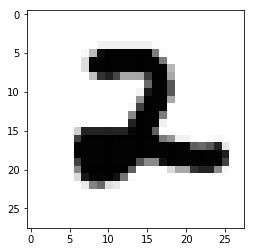

In [45]:
import matplotlib.pyplot as plt
# Get one and predict
r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(
    tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r:r + 1]}))

plt.imshow(mnist.test.images[r:r + 1].
          reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()


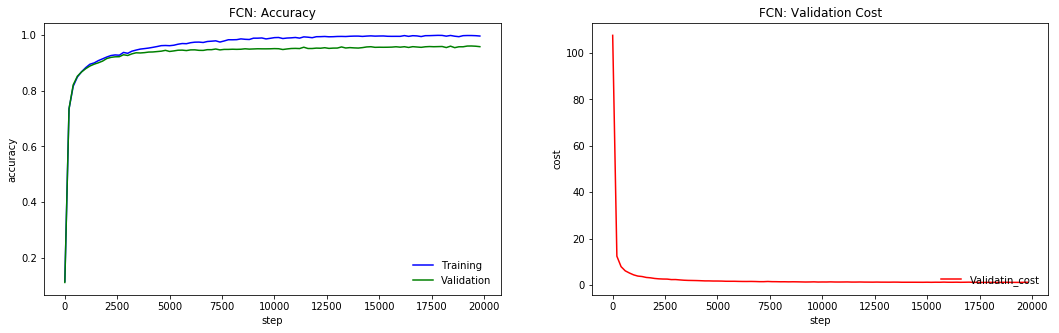

In [46]:
# plot learning result

plt.figure(figsize=(18,5))
plt.subplot(121)
plt.plot(x_range, train_accuracies,'-b', label='Training')
plt.plot(x_range, val_accuracies,'-g', label='Validation')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('accuracy')
plt.xlabel('step')
plt.title('FCN: Accuracy')

plt.subplot(122)
plt.plot(x_range, val_costs,'-r', label='Validatin_cost')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('cost')
plt.xlabel('step')
plt.title('FCN: Validation Cost')
plt.show()


In [1]:
import tensorflow as tf
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

# AND
x_data = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]], dtype=np.float32)
y_data = np.array([[0],
                  [0],
                  [0],
                  [1]], dtype=np.float32)

X = tf.placeholder(tf.float32, [None, 2], name='x-input')
Y = tf.placeholder(tf.float32, [None, 1], name='y-input')

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
with tf.name_scope("layer") as scope:    
    W = tf.Variable(tf.random_normal([2, 1]), name='weight')
    b = tf.Variable(tf.random_normal([1]), name='bias')

    hypothesis = tf.sigmoid(tf.matmul(X, W) + b)
    
    w_hist = tf.summary.histogram("weight", W)
    b_hist = tf.summary.histogram("bias", b)
    hypothesis_hist = tf.summary.histogram("hypothesis", hypothesis)

In [3]:
with tf.name_scope("cost") as scope:
    cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) * tf.log(1 - hypothesis))
    cost_summ = tf.summary.scalar("cost", cost)

with tf.name_scope("train") as scope:
    train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [4]:
# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))
accuracy_summ = tf.summary.scalar("accuracy", accuracy)

In [5]:
# Launch graph
with tf.Session() as sess:
    # tensorboard --logdir=./logs
    merged_summary = tf.summary.merge_all()
    writer = tf.summary.FileWriter("./logs/hello_tf_180115-1")
    writer.add_graph(sess.graph)  # Show the graph
    
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in tqdm_notebook(range(10001)):
        summary, _ = sess.run([merged_summary, train], feed_dict={X: x_data, Y: y_data})
        writer.add_summary(summary, global_step=step)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy], feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect: ", c, "\nAccuracy: ", a)

A Jupyter Widget



Hypothesis:  [[1.2337421e-05]
 [2.0179892e-02]
 [2.0179855e-02]
 [9.7173595e-01]] 
Correct:  [[0.]
 [0.]
 [0.]
 [1.]] 
Accuracy:  1.0
